# Feature Analysis Notebook

This notebook seems to extract, visualize and help understand the different features that can describe sound bites

In [2]:
# Import the required libraries
import librosa
import matplotlib.pyplot as plt
import numpy as np
import librosa.display
import scipy.fftpack
import math
import soundfile as sf
import sklearn.preprocessing
import pandas as pd

from scipy.io import wavfile

from sklearn.neural_network import MLPClassifier

import IPython.display as ipd

## Importing and visualising sounds

In [3]:
speech_file = "../dataset/Speech/84-121123-0001.flac"
music_file = "../dataset/Music/000002.wav"

# read WAV file
# sampling_rate_music, data= wavfile.read(music_file) # enter your filename
sampling_rate_music = librosa.get_samplerate(music_file)
sampling_rate_speech = librosa.get_samplerate(speech_file)

# Load the audio as a waveform `y` and store the sampling rate as `sr`
y_speech, sr_speech = librosa.load(speech_file)
y_music, sr_music = librosa.load(music_file)


# Shape music to be the same length as speech
y_music = y_music[0:y_speech.shape[0]]

# Plot the sound clips
plt.figure(figsize=(15, 4))
plt.subplot(1,2,1)
arr = librosa.display.waveplot(y_speech, sr=sr_speech)
plt.title("Waveform of Audio File Containing Speech");

plt.subplot(1,2,2)
librosa.display.waveplot(y_music, sr=sr_music)
plt.title("Waveform of Audio File Containing Musc");



FileNotFoundError: [Errno 2] No such file or directory: '../dataset/Speech/84-121123-0001.flac'

## Creating Overlapping Slices

In [451]:
# Set paramaters
frequency_of_frames = 50
frame_time_seconds = 1/50 
overlap_time_seconds = 0.002
interval = int(frame_time_seconds * 1000)
overlap = int(overlap_time_seconds * 1000)

# Initialize start and end seconds to 0 
start = 0
end = 0

# Length of audiofile in milliseconds
n = int(len(y_speech)/sr_speech*1000)

# counters and flags
counter = 1
flag = 0

# Logic for slicing
for i in range(0, 2 * n, interval): 
    if i == 0: 
        start = 0
        end = interval 
    else: 
        start = end - overlap 
        end = start + interval  
    if end >= n: 
        end = n 
        flag = 1
    counter = counter + 1
    print("{} sample \t{} sample".format(int(start/1000*sr_speech),int(end/1000*sr_speech)))
    if flag == 1: 
        break

print(counter)
    


0 sample 	441 sample
396 sample 	837 sample
793 sample 	1234 sample
1190 sample 	1631 sample
1587 sample 	2028 sample
1984 sample 	2425 sample
2381 sample 	2822 sample
2778 sample 	3219 sample
3175 sample 	3616 sample
3572 sample 	4013 sample
3969 sample 	4410 sample
4365 sample 	4806 sample
4762 sample 	5203 sample
5159 sample 	5600 sample
5556 sample 	5997 sample
5953 sample 	6394 sample
6350 sample 	6791 sample
6747 sample 	7188 sample
7144 sample 	7585 sample
7541 sample 	7982 sample
7938 sample 	8379 sample
8334 sample 	8775 sample
8731 sample 	9172 sample
9128 sample 	9569 sample
9525 sample 	9966 sample
9922 sample 	10363 sample
10319 sample 	10760 sample
10716 sample 	11157 sample
11113 sample 	11554 sample
11510 sample 	11951 sample
11907 sample 	12348 sample
12303 sample 	12744 sample
12700 sample 	13141 sample
13097 sample 	13538 sample
13494 sample 	13935 sample
13891 sample 	14332 sample
14288 sample 	14729 sample
14685 sample 	15126 sample
15082 sample 	15523 sample
15479

## Spectogram 

A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time.

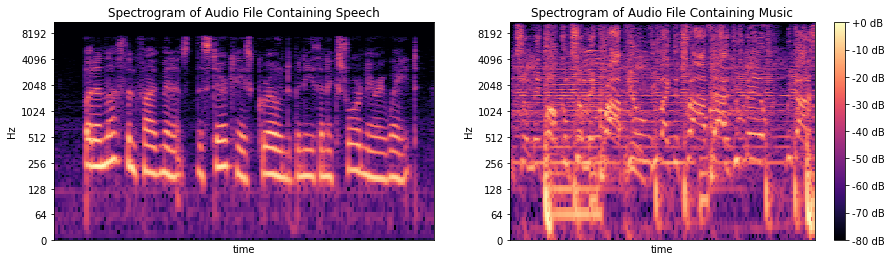

In [452]:
plt.figure(figsize=(15, 4))

plt.subplot(1,2,1)
Spec_speech = librosa.amplitude_to_db(np.abs(librosa.stft(y_speech)), ref=np.max)
librosa.display.specshow(Spec_speech, y_axis='log')
plt.title('Spectrogram of Audio File Containing Speech');
plt.xlabel('time');

plt.subplot(1,2,2)
Spec_music = librosa.amplitude_to_db(np.abs(librosa.stft(y_music)), ref=np.max)
librosa.display.specshow(Spec_music, y_axis='log')
plt.title('Spectrogram of Audio File Containing Music');
plt.xlabel('time');

plt.colorbar(format='%+2.0f dB');

## Power Spectrogram

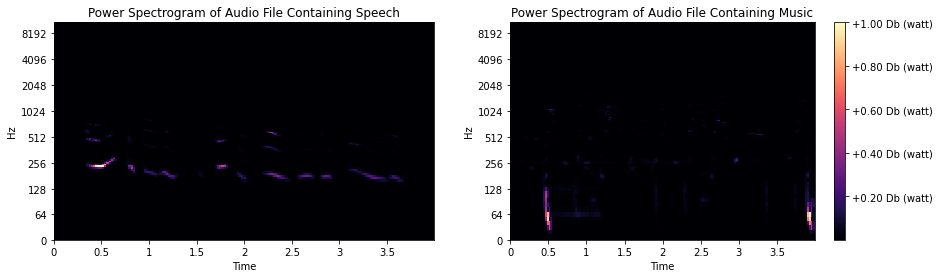

In [453]:
# Calculate Power Spectrogram
power_psec_speech = librosa.db_to_power(Spec_speech)
power_psec_music = librosa.db_to_power(Spec_music)

# Display results
plt.figure(figsize=(15, 4))

plt.subplot(1,2,1)
librosa.display.specshow(power_psec_speech, y_axis='log',x_axis='time')
plt.title('Power Spectrogram of Audio File Containing Speech');
# plt.xlabel('time');

plt.subplot(1,2,2)
librosa.display.specshow(power_psec_music, y_axis='log',x_axis='time')
plt.title('Power Spectrogram of Audio File Containing Music');
# plt.xlabel('time');

plt.colorbar(format='%+2.2f Db (watt)');

## Mel Spectogram

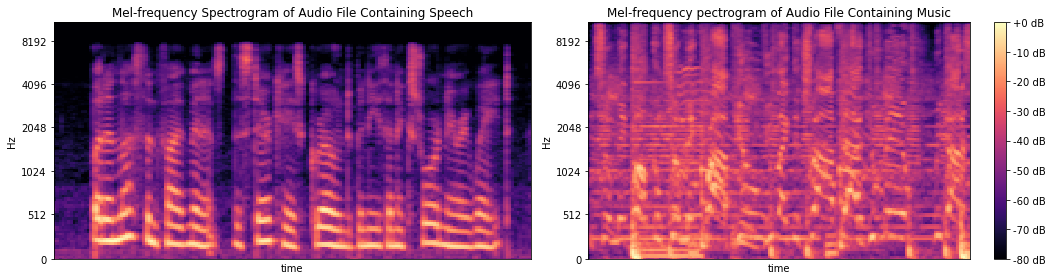

In [454]:
mel_spec_speech=librosa.feature.melspectrogram(y_speech)
mel_spec_music=librosa.feature.melspectrogram(y_music)

S_db_mel_spec_speech = librosa.power_to_db(mel_spec_speech, ref=np.max)
S_db_mel_spec_music = librosa.power_to_db(mel_spec_music, ref=np.max)

plt.figure(figsize=(15, 4))

plt.subplot(1,2,1)
librosa.display.specshow(S_db_mel_spec_speech, y_axis='mel')
plt.title('Mel-frequency Spectrogram of Audio File Containing Speech');
plt.xlabel('time');

plt.subplot(1,2,2)
librosa.display.specshow(S_db_mel_spec_music, y_axis='mel')
plt.title('Mel-frequency pectrogram of Audio File Containing Music');
plt.xlabel('time');

plt.tight_layout()
plt.colorbar(format='%+2.0f dB');

## Zero-Crossing Rate

The zero-crossing rate is the rate of sign-changes along a signal, i.e., the rate at which the signal changes from positive to zero to negative or from negative to zero to positive, and can be used as a key feature to classify percussive sounds

Number of frames : 267


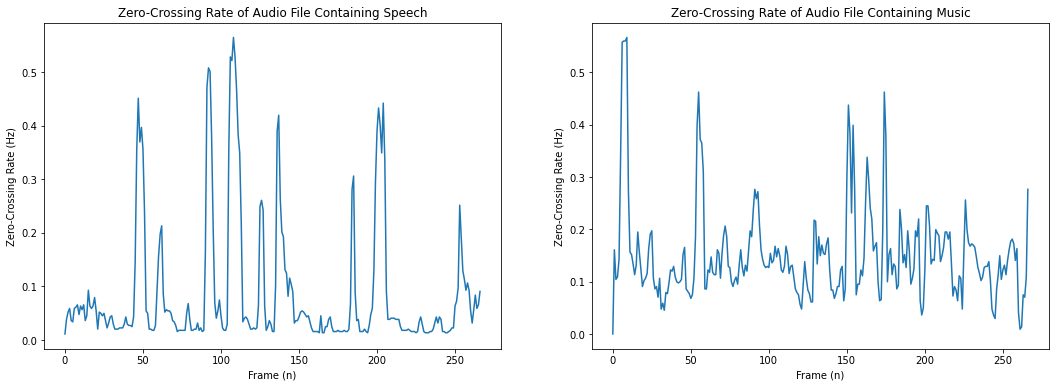

In [455]:
plt.figure(figsize=(18, 6))

# Determine frame length
frame_freq = 50
frame_length = int (sr_speech / frame_freq)          # number of samples a frame is composed of
hop_length = int(frame_length*3/4)                   # delay from start of one frame to start of next frame                    

# Get zero crossing rate
speech_crossrate = librosa.feature.zero_crossing_rate(y_speech,frame_length=frame_length,hop_length=hop_length)
music_crossrate  = librosa.feature.zero_crossing_rate(y_music[0:y_speech.shape[0]],frame_length=frame_length,hop_length=hop_length)

# Display results
plt.subplot(1,2,1)
plt.plot(speech_crossrate[0]);
plt.title('Zero-Crossing Rate of Audio File Containing Speech');
plt.xlabel('Frame (n)');
plt.ylabel('Zero-Crossing Rate (Hz)');

plt.subplot(1,2,2)
plt.plot(music_crossrate[0]);
plt.title('Zero-Crossing Rate of Audio File Containing Music');
plt.xlabel('Frame (n)');
plt.ylabel('Zero-Crossing Rate (Hz)');

print("Number of frames : {}".format(speech_crossrate.size))

### Variance of Zero-Crossing Rate

Allows us to measure distribution of zero-crossing rate. This is done by
- Measuring the local variance of zero-crossing rate  over each second of data (50 frames)
- Measure mean of local variances

In [456]:
# Calculate Local Variance of Zero-Crossing Rate
local_var_zero_crossing_speech = []
local_var_zero_crossing_music = []

end=0
for i in range ( 0 , int( speech_crossrate.size/50) ):
    local_var_zero_crossing_speech.append( np.var(speech_crossrate[0][( 50*i ):( (50-1)*(i+1) )]) )
    local_var_zero_crossing_music.append ( np.var(music_crossrate[0][( 50*i ):( (50-1)*(i+1) )]) )
    # print(np.var(speech_crossrate[( 50*i ):( (50-1)*(i+1) )]))
    # print("{} {}".format(50*i, (50-1)*(i+1)))
    end = i+1
# print("{} {}".format(50*end, speech_crossrate.size-1))
local_var_zero_crossing_speech.append( np.var(speech_crossrate[0][( 50*end ): speech_crossrate.size ]) )
local_var_zero_crossing_music.append( np.var(speech_crossrate[0][( 50*end ): music_crossrate.size ]) )

# Calculate Average Variance of Zero-Crossing Rate
avg_var_zero_crossing_speech = np.average(local_var_zero_crossing_speech)
avg_var_zero_crossing_music = np.average(local_var_zero_crossing_music)

# Print Results
print("Local Variances of Speech Zero-Crossing rate is {} with an average of {} ".format(local_var_zero_crossing_speech, avg_var_zero_crossing_speech ))
print("Local Variances of Music Zero-Crossing rate is {} with an average of {} ".format(local_var_zero_crossing_music, avg_var_zero_crossing_music ))

print()

print('Total variance of Speech Zero-Crossing rate : ', np.var(speech_crossrate))
print('Total variance of Music Zero-Crossing rate : ',np.var(music_crossrate))

Local Variances of Speech Zero-Crossing rate is [0.00751366186484126, 0.017479568751788948, 0.028904258555816513, 0.0032127289802166403, 0.015757408400871427, 0.002714846998779059] with an average of 0.01259707892538564 
Local Variances of Music Zero-Crossing rate is [0.017392507682227425, 0.007770030305731094, 0.0017173355513153694, 0.01028190497107959, 0.002635806690564396, 0.002714846998779059] with an average of 0.0070854053666161545 

Total variance of Speech Zero-Crossing rate :  0.015131290473485996
Total variance of Music Zero-Crossing rate :  0.00817567162343631


## Fast Faourier Transform (FFT)

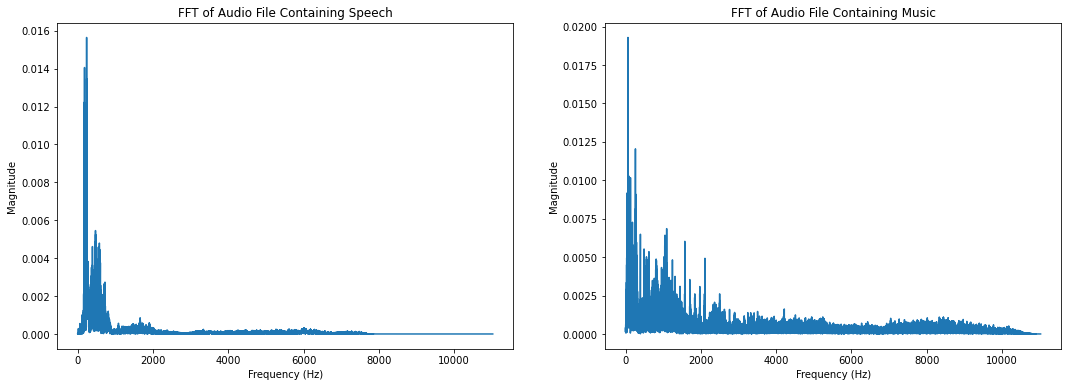

In [457]:
# Number of samplepoints
N_music = int(y_music.shape[0])
N_speech = int(y_speech.shape[0])

# sample spacing
T_music = 1.0 / sr_music
T_speech = 1.0 / sr_speech

## FFT
speech_fft = scipy.fftpack.fft(y_speech)
music_fft = scipy.fftpack.fft(y_music)

## Frequencies
speech_freqs = np.linspace(0.0, 1.0/(2.0*T_speech), int(N_speech/2))
music_freqs = np.linspace(0.0, 1.0/(2.0*T_music), int(N_music/2))

# Plot Results
plt.figure(figsize=(18, 6))

plt.subplot(1,2,1)
plt.plot(speech_freqs, 2.0/N_speech * np.abs(speech_fft[:N_speech//2]));
plt.title('FFT of Audio File Containing Speech')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.subplot(1,2,2)
plt.plot(music_freqs, 2.0/N_music * np.abs(music_fft[:N_music//2]));
plt.title('FFT of Audio File Containing Music')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude');


## Mel Frequency Cepstral Coefficients (MFCCs)

In [458]:
# Extract MFCCs
mfccs_speech = librosa.feature.mfcc(y_speech)
mfccs_music = librosa.feature.mfcc(y_music)

# Scale MFCCs
mfccs_speech = sklearn.preprocessing.scale(mfccs_speech, axis=1)
mfccs_music = sklearn.preprocessing.scale(mfccs_music, axis=1)

C:\Users\user-pc\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\user-pc\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\preprocessing\_data.py:191: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\user-pc\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\U

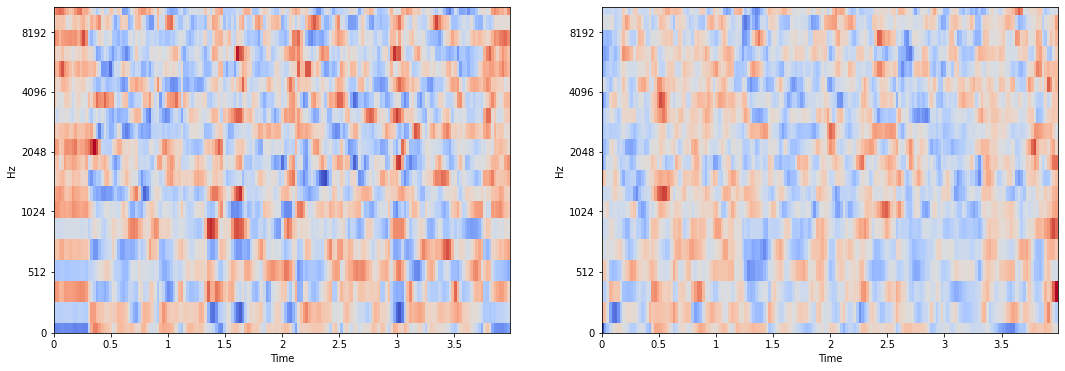

In [459]:
# Plot Results
plt.figure(figsize=(18, 6));

plt.subplot(1,2,1)
librosa.display.specshow(mfccs_speech, x_axis='time',y_axis='mel')

plt.subplot(1,2,2)
librosa.display.specshow(mfccs_music, x_axis='time',y_axis='mel')

## Percentage of "Low Energy" Frames

In [460]:
# Calculate RMS power for each frame

Number of frames : 267


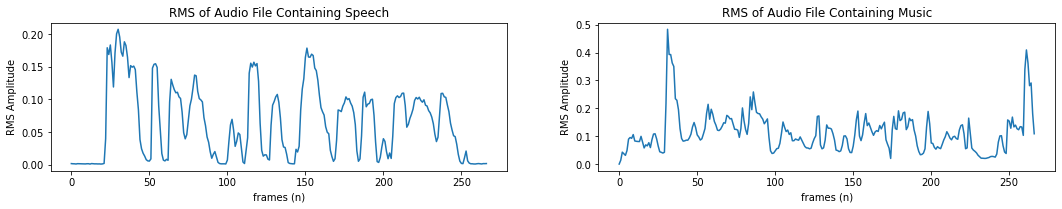

In [461]:
# Calculate RMS Values
rms_speech = librosa.feature.rms(y=y_speech,frame_length=frame_length,hop_length=hop_length)
rms_music = librosa.feature.rms(y=y_music,frame_length=frame_length,hop_length=hop_length)

# Display Results
plt.figure(figsize=(18, 6))

plt.subplot(2,2,1)
plt.plot(rms_speech.T);
plt.title('RMS of Audio File Containing Speech');
plt.xlabel('frames (n)');
plt.ylabel('RMS Amplitude');

plt.subplot(2,2,2)
plt.plot( rms_music.T);
plt.title('RMS of Audio File Containing Music');
plt.xlabel('frames (n)');
plt.ylabel('RMS Amplitude');

print("Number of frames : {}".format(rms_speech.T.size))

In [463]:
# Calculate Local Average RMS
local_rms_speech = []
local_rms_music = []
local_rms_speech_extened = []
local_rms_music_extened = []

# "low energy" frames
low_e_frames_speech = 0
low_e_frames_music = 0
test = 0

end=0
for i in range ( 0 , int( rms_speech.size/frame_freq) ):
    local_rms_speech.append( np.mean(rms_speech.T[( 50*i ):( (50-1)*(i+1) )]) )
    local_rms_music.append ( np.mean(rms_music.T[( 50*i ):( (50-1)*(i+1) )]) )
    end = i +1
    # Determine low_energy frames
    for index in range(50*i,(50)*(i+1)):
        local_rms_speech_extened.append(local_rms_speech[i])
        local_rms_music_extened.append(local_rms_music[i])
        if(rms_speech.T[index]<=local_rms_speech[i]) : low_e_frames_speech +=1
        else : test+=1
        if(rms_music.T[index]<=local_rms_music[i]) : low_e_frames_music +=1

local_rms_speech.append( np.mean(rms_speech.T[( 50*end ): rms_speech.T.size ]) )
local_rms_music.append( np.mean(rms_music.T[( 50*end ): rms_speech.T.size ]) )

for index in range(50*end,rms_speech.T.size):
    local_rms_speech_extened.append(local_rms_speech[end])
    local_rms_music_extened.append(local_rms_music[end])
    if(rms_speech.T[index]<=local_rms_speech[end]) : low_e_frames_speech +=1
    else : test+=1
    if(rms_music.T[index]<=local_rms_music[end]) : low_e_frames_music +=1

# Results
print(test)
print(low_e_frames_speech)

print("Percentage of frames below 50% of mean in speech : {:3.2f} %".format(low_e_frames_speech/rms_speech.T.size*100))
print("Percentage of frames below 50% of mean in music : {:3.2f} %".format(low_e_frames_music/rms_music.T.size*100))

121
146
Percentage of frames below 50% of mean in speech : 54.68 %
Percentage of frames below 50% of mean in music : 57.30 %


## Visualize RMS Data

Percentage of frames below 50% of mean in speech : 54.68 %
Percentage of frames below 50% of mean in speech : 57.30 %


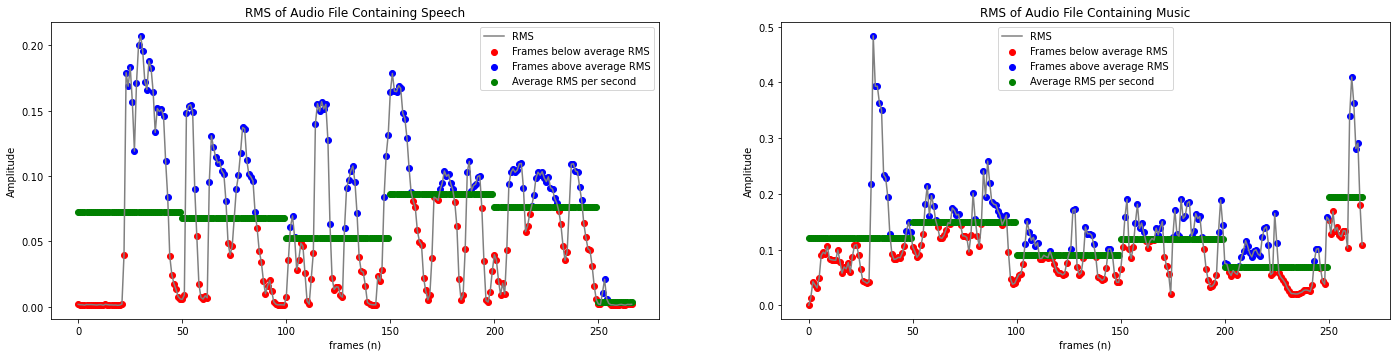

In [464]:
y_speech_below = []
x_speech_below = []
y_speech_above = []
x_speech_above = []

y_music_below = []
x_music_below = []
y_music_above = []
x_music_above = []

# Speech
for i,x in enumerate(rms_speech.T):
    if x<=local_rms_speech_extened[i]:
        y_speech_below.append(x)
        x_speech_below.append(i)
    else:
        y_speech_above.append(x)
        x_speech_above.append(i)

# Music
for i,x in enumerate(rms_music.T):
    if x<=local_rms_music_extened[i]:
        y_music_below.append(x)
        x_music_below.append(i)
    else:
        y_music_above.append(x)
        x_music_above.append(i)

# Visualise Results
plt.figure(figsize=(24, 12));

plt.subplot(2,2,1);
plt.plot(rms_speech.T,label="RMS",color='grey');
plt.scatter(x_speech_below,y_speech_below,label="Frames below average RMS",color='r');
plt.scatter(x_speech_above,y_speech_above,label="Frames above average RMS",color='b');
plt.scatter(np.arange(0,len(local_rms_speech_extened)),local_rms_speech_extened,label="Average RMS per second",color='g')
plt.title('RMS of Audio File Containing Speech');
plt.xlabel('frames (n)');
plt.ylabel('Amplitude');
plt.legend();

plt.subplot(2,2,2);
plt.plot(rms_music.T,label="RMS",color='grey');
plt.scatter(x_music_below,y_music_below ,label="Frames below average RMS",color='r');
plt.scatter(x_music_above,y_music_above,label="Frames above average RMS",color='b');
plt.scatter(np.arange(0,len(local_rms_music_extened)),local_rms_music_extened,label="Average RMS per second",color='g')
plt.title('RMS of Audio File Containing Music');
plt.xlabel('frames (n)');
plt.ylabel('Amplitude');
plt.legend();

print("Percentage of frames below 50% of mean in speech : {:3.2f} %".format(len(y_speech_below)/( len(y_speech_below) + len (y_speech_above))*100))
print("Percentage of frames below 50% of mean in speech : {:3.2f} %".format(len(y_music_below)/( len(y_music_below) + len (y_music_above))*100))


## RMS Averages over the Entire Audio Clip

In [465]:
print("Average RMS value of Speech : {:2.5f}".format(np.mean(rms_speech)))
print("Average RMS value of Music : {:2.5f}".format(np.mean(rms_music)))
print('Music clearly has a higher mean energy, as expected\n')


low_e_frames_music = [x for x in rms_music.T if x < np.mean(rms_music)*0.5]
low_e_frames_speech = [x for x in rms_speech.T if x < np.mean(rms_speech)*0.5]

print('Percentage of frames below 50% of mean in music', 100 * len(low_e_frames_music) / rms_music.shape[1], '\n')
print('Percentage of frames below 50% of mean in speech', 100 * len(low_e_frames_speech) / rms_speech.shape[1])

Average RMS value of Speech : 0.06480
Average RMS value of Music : 0.11420
Music clearly has a higher mean energy, as expected

Percentage of frames below 50% of mean in music 20.224719101123597 

Percentage of frames below 50% of mean in speech 38.57677902621723
